# Numerical Simulation Laboratory
## Exercise Sheet 07
### Exercise 07.1 
We use the MC-NVT code to run a Monte-Carlo simulation of Lennard-Jones particles with different thermodinamic parameters, resulting in different phases. We store the istantaneous values of energy and pressure at each simulation step, and compute the autocorrelation of the resulting time-series: 

#### Potential energy:

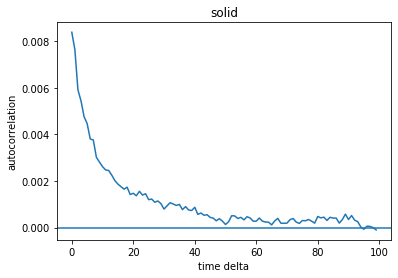

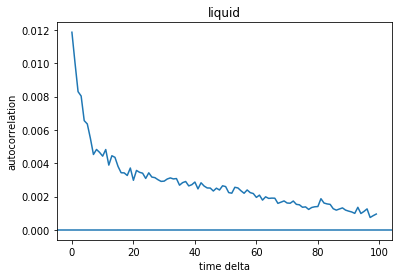

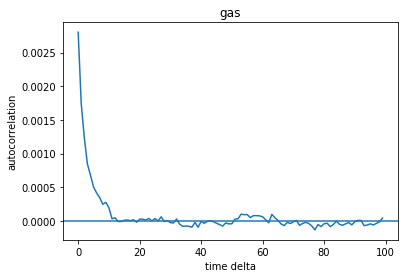

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;

def autocorr(arr, n_points=2000, maxsize=1000):
    n_max = len(arr)
    result = np.zeros(n_points)
    eav = np.average(arr)
    
    for i in range(0,n_points):
        asum = 0;
        # nchunk = min(maxsize, n_max-i)
        for j in range(0, maxsize):
            k = int(np.floor(np.random.rand()*(n_max-i)  ))
            asum = asum + (arr[k]-eav)*(arr[i+k]-eav)
        asum = asum / (maxsize)
        result[i] = asum
    return result

n_p = 100
load_limit = 9000
averaging_block = 8000
for name in ['solid','liquid','gas']:
    dat = np.loadtxt( "acorr/x"+name+"/output.epot.frames")
    fig, ax = plt.subplots()
    dat = dat[:load_limit]
    ax.plot(range(0,n_p) , autocorr(dat,n_points=n_p, maxsize=averaging_block))
    ax.axhline(0)
    ax.set_title(name); ax.set_xlabel("time delta"); ax.set_ylabel("autocorrelation")
plt.show()

#### Pressure:

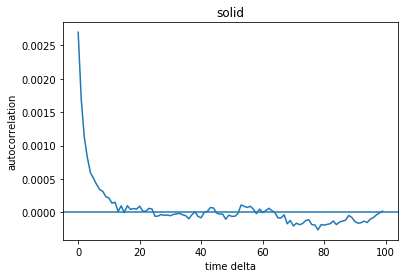

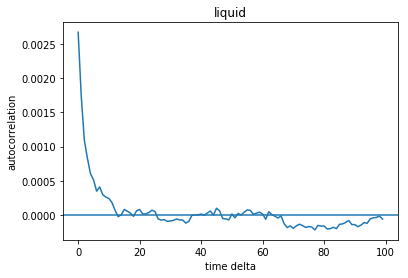

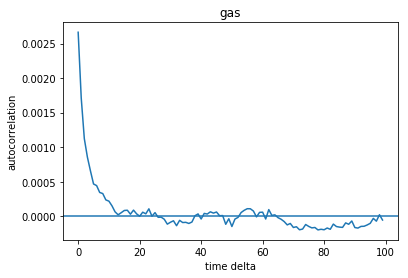

In [142]:
n_p = 100
load_limit = 9000
averaging_block = 8000
for name in ['solid','liquid','gas']:
    dat = np.loadtxt( "acorr/x"+name+"/output.pres.frames")
    fig, ax = plt.subplots()
    dat = dat[:load_limit]
    ax.plot(range(0,n_p) , autocorr(gas_en,n_points=n_p, maxsize=averaging_block))
    ax.axhline(0)
    ax.set_title(name); ax.set_xlabel("time delta"); ax.set_ylabel("autocorrelation")
plt.show()

Since we calibrated the Metropolis parameters to have a ~50% accuracy in all cases, it is not surprising to see that the shape and scale of the autocorrelation functions do not change much.  

Next, we use the same data to study how the uncertainty of the final results for $U/N$ and $P$ depend on the size of the blocks in the data-blocking calculation.
Apart from the more subtle dependence on the size of the block $S_z$ , the uncertainty also has an explicit dependence on the number of blocks $n_b$ through the multiplicative factor $\dfrac{1}{\sqrt{n_b}}$. To take account of this fact, we performed all data-blocking calculations with the same $n_b$.
This means that $n_b$ is constrained by the maximum $S_z$ used and by the total number of points available $N$ , by $ S_z \times n_b < N $.
Since recorded simulation data covers $10000$ time steps, we limited ourself to $S_z = 1000$ in order to have a bare-minimum $n_b = 10$. 

#### Energy:

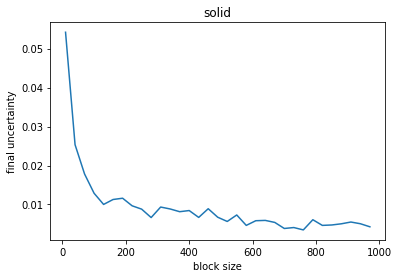

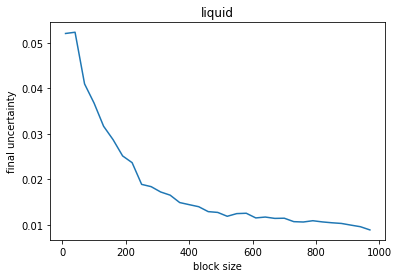

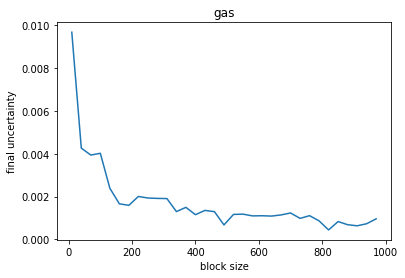

In [154]:
blocksz = np.arange(10,1000,30 )

#for name in ['gas']:
for name in ['solid','liquid','gas']:
    fig, ax = plt.subplots()
    outr = np.zeros(len(blocksz))
    for bk in range(len(blocksz)):
        dat = np.loadtxt( "acorr/x"+name+"/output.epot.frames")
        #blockn = (len(dat)//blocksz[bk]) #this is pretty unfair i think
        blockn = len(dat)//blocksz[-1]
        #res = np.zeros( blockn )
        #err = np.zeros( blockn )
        outersum = 0; outersum2 = 0;
        for i in range(blockn):
            innerav = np.average(dat[i*blocksz[bk]:(i+1)*blocksz[bk]])
            outersum += innerav; outersum2 += innerav**2
            #avsofar = outersum/(i+1)
            #errsofar = np.sqrt((outersum2/(i+1) - (outersum/(i+1))**2)/(i+1))
            #res[i] = avsofar; err[i] = errsofar
        #fig, ax = plt.subplots()
        #ax.errorbar(range(1,blockn+1), res, yerr=err)
        outr[bk] = np.sqrt((outersum2/(i+1) - (outersum/(i+1))**2)/(i+1))
    ax.plot(blocksz, outr)
    ax.set_title(name); ax.set_xlabel('block size'); ax.set_ylabel('final uncertainty')
        
plt.show()

#### Pressure:

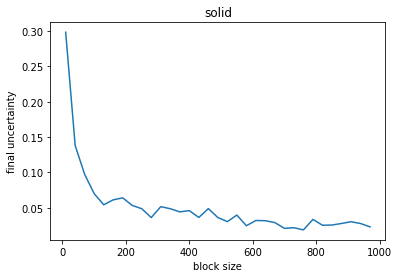

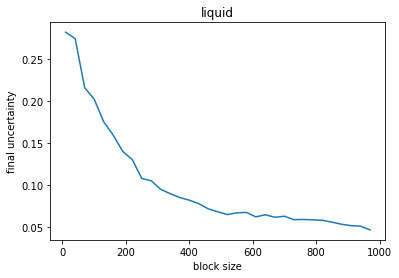

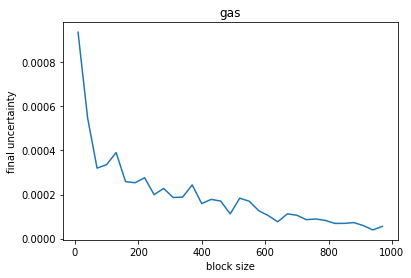

In [153]:
blocksz = np.arange(10,1000,30 )

#for name in ['gas']:
for name in ['solid','liquid','gas']:
    fig, ax = plt.subplots()
    outr = np.zeros(len(blocksz))
    for bk in range(len(blocksz)):
        dat = np.loadtxt( "acorr/x"+name+"/output.pres.frames")
        #blockn = (len(dat)//blocksz[bk]) #this is pretty unfair i think
        blockn = len(dat)//blocksz[-1]
        #res = np.zeros( blockn )
        #err = np.zeros( blockn )
        outersum = 0; outersum2 = 0;
        for i in range(blockn):
            innerav = np.average(dat[i*blocksz[bk]:(i+1)*blocksz[bk]])
            outersum += innerav; outersum2 += innerav**2
            #avsofar = outersum/(i+1)
            #errsofar = np.sqrt((outersum2/(i+1) - (outersum/(i+1))**2)/(i+1))
            #res[i] = avsofar; err[i] = errsofar
        #fig, ax = plt.subplots()
        #ax.errorbar(range(1,blockn+1), res, yerr=err)
        outr[bk] = np.sqrt((outersum2/(i+1) - (outersum/(i+1))**2)/(i+1))
    ax.plot(blocksz, outr)
    ax.set_title(name); ax.set_xlabel('block size'); ax.set_ylabel('final uncertainty')
        
plt.show()

As expected, bigger block sizes give more accurate final results.

### Exercise 07.2
We include the calculation of the radial distribution function $g(r)$ in the C++ code.

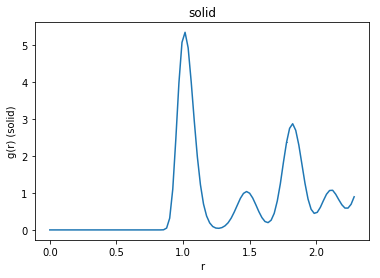

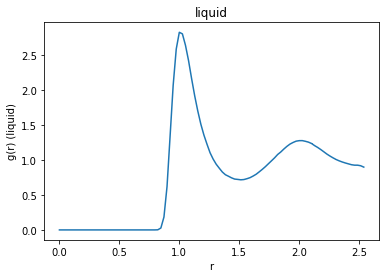

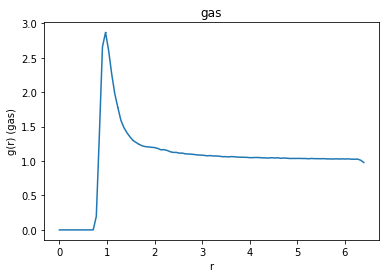

In [40]:
for name in ['solid','liquid','gas']:
    r, g, err = np.loadtxt('g-r/'+name+'/output.gave.0', unpack=True)
    plt.errorbar(r,g,yerr=err)
    plt.title(name)
    plt.xlabel('r')
    plt.ylabel('g(r) ('+name+')')
    plt.show()


### Exercise 07.4
We add the calculation of the radial distribution function $g(r)$ to the Molecular Dynamics code used in Exercise Sheet 4, and we calculate it in the same thermodynamic conditions as above.

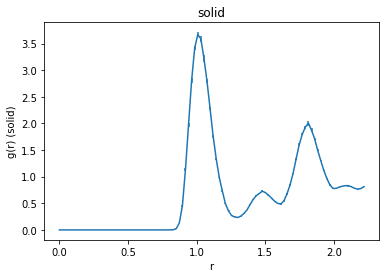

In [51]:
import numpy as np
import matplotlib.pyplot as plt
k, r, g, err = np.loadtxt('../04/mol/confignew/t08/final_gr.dat', unpack=True)
plt.errorbar(r,g,yerr=err)
i = 50
name="solid"
plt.title(name)
plt.xlabel('r')
plt.ylabel('g(r) ('+name+')')
plt.show()

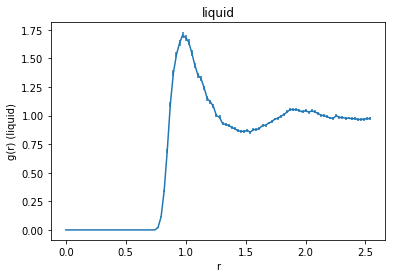

In [47]:
import numpy as np
import matplotlib.pyplot as plt
k, r, g, err = np.loadtxt('../04/mol/confignew/t11/final_gr.dat', unpack=True)
plt.errorbar(r,g,yerr=err)
i = 50
name="liquid"
plt.title(name)
plt.xlabel('r')
plt.ylabel('g(r) ('+name+')')
plt.show()

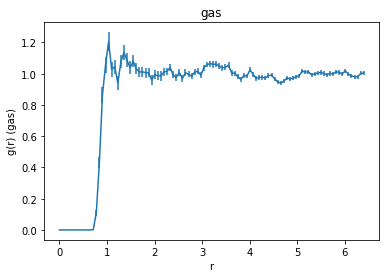

In [46]:
import numpy as np
import matplotlib.pyplot as plt
k, r, g, err = np.loadtxt('../04/mol/confignew/t12/final_gr.dat', unpack=True)
plt.errorbar(r,g,yerr=err)
i = 50
name="gas"
plt.title(name)
plt.xlabel('r')
plt.ylabel('g(r) ('+name+')')
plt.show()

We note that for the solid phase parameters $\rho^\star = 1.1$, $T^\star = 0.8$ it becomes difficult to maintain a stable solid phase. A correct, equilibrated MD simulation with these parameters seems to always result in melting and a liquid-like $g(r)$. The expected solid-like $g(r)$ can be observed only with considerably lower temperature ($T^\star \simeq 0.3$), or in the first cycles of the simulation in which the initial solid is melting. 